# Time Series Properties

### Colored Noise
### 1/f

##### Julio Dominguez

In [1]:
import numpy as np
import pandas as pd
import colorednoise as cn
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib import pylab as plt
import mne
from fooof import FOOOF
from fooof import FOOOFGroup
import random
import math

White light is composed of all colors that we see, ranging from 430-770 THz (wavelength of about 390 to 700 nanometers). In the digital signal context, the same idea is applied to noise. Auditorial white noise is composed of all the frequencies we hear, 20-20,000 Hz

### White Noise

White noise is characterized by the fact that the power in any two frequencies is independant. This impies that through the law of large numbers (https://en.wikipedia.org/wiki/Law_of_large_numbers) white noise has equal power across bands with the same bandwidth. For example, there is the same amount of power in [20, 50] as there is in [4000, 4030] since the bandwidth is the same for both.

The following cells generates white noise from 20-200 Hz

In [2]:
def white_noise_uniform(freqs):
    # freqs is an array, we need to populate it with statistically uncorrelated numbers
    elems = []
    
    # offsets noise generate to match range provided
    init = freqs[0]
    for i in range(init):
        elems.append(0)
        
    #generates power values for freqs
    for i in range(len(freqs)):
        elems.append(random.uniform(-1,1))
    return elems

In [3]:
def white_noise_gaussian(freqs):
    # freqs is an array, we need to populate it with statistically uncorrelated numbers
    elems = []
    
    # offsets noise generate to match range provided
    init = freqs[0]
    for i in range(init):
        elems.append(0)
        
    #generates power values for freqs
    for i in range(len(freqs)):
        elems.append(np.random.normal(0,1))
    return elems

#### White Noise - Frequency Domain

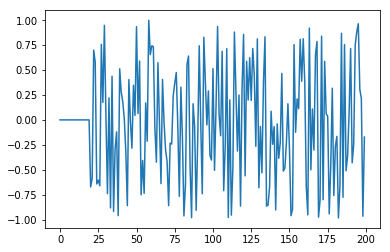

In [4]:
plt.plot(white_noise_uniform(range(20,200)))

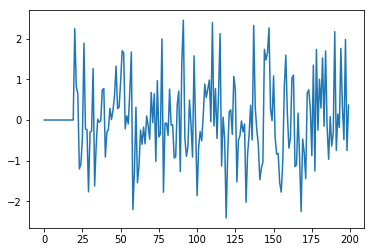

In [5]:
plt.plot(white_noise_gaussian(range(20,200)))

Above, two methods of generating white noise is shown - one involving drawing independent samples from a uniform distribution[-1,1] and the other involving a normal gaussian disribution[mu = 0, sd = 1]. Any PDF can be used to model white noise. The difference in PDF is a matter of the range  and liklihood of the power values each sampled frequency can take. For example, notice that the uniformly drawn white noise has absolute power limits within [-1, 1] where as the gaussian white noise ranges further which mirrors its PDF. In the two cells directly above, try changing the range from "range(20, 200)" to "range(20,20000)" This further exemplifies the function of PDF in noise generation.

The two plots above are in the frequency domain. We can apply the inverse fourier transform to see these signals in the time domain.

#### White Noise - Time Domain

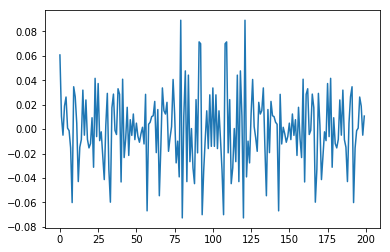

In [6]:
time_series_uniform = np.fft.ifft(white_noise_uniform(range(20,200)))
plt.plot(time_series_uniform.real)

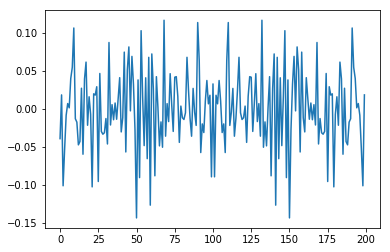

In [7]:
time_series_gaussian = np.fft.ifft(white_noise_gaussian(range(20,200)))
plt.plot(time_series_gaussian.real)

### pink noise 

pink noise is similar to white noise except its linearity is present in log-log axes. This implies there is the same amount of power within [50, 100] as there is n [500, 1000]. The folowing cell generates pink noise using an algorithm from this paper Timmer, J. and Koenig, M.: On generating power law noise. Astron. Astrophys. 300, 707-710 (1995)

In [8]:
def pink_noise(beta=1, samples=2**18):
    
    return cn.powerlaw_psd_gaussian(beta, samples)


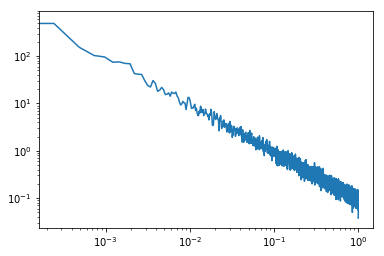

In [9]:
s, f = mlab.psd(pink_noise(), NFFT=2**13)
plt.loglog(f,s)

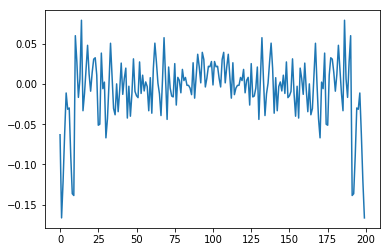

In [10]:
pink_time_series = np.fft.ifft(pink_noise(1, 200))
plt.plot(pink_time_series.real)

Notice in the frequency domain the shape of the data. If we instead change the plot from loglog space to linear space we get the following

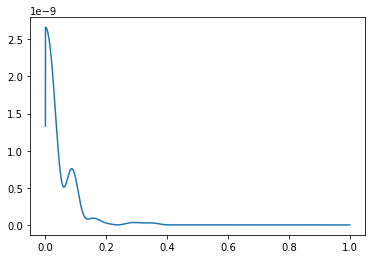

In [29]:
s, f = mlab.psd(pink_noise(4,50), NFFT=2**13)
plt.plot(f,s)

Notice the shape can be described as ***roughly*** f(x) = 1/x or in other words, the power is inversely proportional to its frequency. This is where we get our 1/f phenomena. Many things in nature follow this pattern such as the distribution of word frequency ***in any language***, population of different cities, size of craters left from meteorites, and finally, the distribution of power spectral density. Further information can be found here (https://www.youtube.com/watch?v=fCn8zs912OE)

### Enter: 1/f

One way this 1/f phenomena can be observed is through the frequency representation of EEG data. The following cells loads in EEG time series data to a tool called MNE, which is used as an EEG analysis tool in VoytekLab.

In [15]:
data = mne.io.read_raw_cnt('./dat/cba1ff01.cnt', mne.channels.read_montage("standard_1005"),verbose=False)
psds, freqs = mne.time_frequency.psd_welch(data)

  Could not parse meas date from the header. Setting to None.
The following EEG sensors did not have a position specified in the selected montage: ["T5'", "T6'", "O1'", "O2'", 'P3"', 'P4"', 'PZ"', 'I', 'CB1"', 'CB2"', 'CB1', 'CB2']. Their position has been left untouched.
Effective window size : 0.256 (s)


<ipython-input-15-d3f0d895f64f>:1: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  data = mne.io.read_raw_cnt('./dat/cba1ff01.cnt', mne.channels.read_montage("standard_1005"),verbose=False)
<ipython-input-15-d3f0d895f64f>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ["T5'", "T6'", "O1'", "O2'", 'P3"', 'P4"', 'PZ"', 'I', 'CB1"', 'CB2"', 'CB1', 'CB2']. Their position has been left untouched.
  data = mne.io.read_raw_cnt('./dat/cba1ff01.cnt', mne.channels.read_montage("standard_1005"),verbose=False)


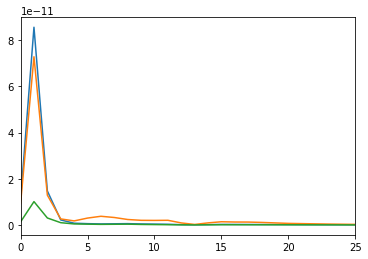

In [30]:
plt.xlim(xmax=25)
for i in range(3):
    plt.plot(psds[i])

Here we can see that some of the EEG channels were able to capture that 1/f phenomena.